## ENGI E1006: Introduction to Computing for Engineers and Applied Scientists
---

`numpy` gave us the powerful `ndarray` class, which let us represent vectors and matrices, and perform vectorized operations on them.

In [ ]:
import numpy as np
mat = np.random.random((10, 10))
mat

This is obviously extremely useful, but real-world data requires a bit more.
- How do i refer to a column of this matrix by name?
- Can i add a new column? What about adding a new column with only a single field populated?
- Can i change the data type of a column?

For these questions, we cannot easily do them. Matrices are not Tables.

Instead, we want a more Excel-like interface to data. This is where `pandas` fits in.

In [ ]:
import pandas as pd
df = pd.DataFrame(data=np.random.random((10, 4)), columns=['A', 'B', 'C', 'D'])
df

In [ ]:
# Access data by column
df['A']

In [ ]:
# Add a new column
df['E'] = np.random.random(10)

In [ ]:
df

In [ ]:
# Change column type
df['A'] = round(df['A'], 2).astype(str)
df

## Pandas architecture
Pandas is a very large and complicated project, so it won't be possible to discuss how everything works. We'll just cover the basics.

A column of a table, called a `Series`, is like a `numpy` array. It has a common data type, supports vectorized operations, has helpful methods like `sum` and `mean`, etc.

<img src="assets/1.png" width=550></img>


A collection of `Series` can be grouped into a `DataFrame`, which is the pandas representation of a Table. We can access our table by column name (to grab columns), or by row index to grab rows.

<img src="assets/2.png" width=550></img>


Row index and Column index let us do `pivoting`. By default, the row index is just the row number, and the column index is just the column name, but we can set these to different/multiple indexes to do pivoting and aggregation (more of this to come later).

<img src="assets/3.png" width=550></img>


DataFrames support a large number of operations:
- Concatenating and Joining tables
- Pivoting and Unpivoting tables
- Calculating statistics
- Plotting
- Applying functions
- Indexing and Slicing
- Bucketing (histogramming)
- Converting
    - to/from csv
    - to/from numpy
    - to/from excel
    - and many other formats

We'll only cover a few of these, you can find extensive documentation and tutorials on the [pandas website](https://pandas.pydata.org/docs/index.html).



Let's take a look at our `superstore.csv` to see what we can do with pandas.

In [ ]:
pd?

In [ ]:
pd.read_csv?

In [ ]:
df = pd.read_csv("superstore.csv")

In [ ]:
df

In [ ]:
# Get the top N rows (default is 10)
df.head(10)

In [ ]:
# RowID is the index. Lets set it to be the index
df.set_index("Row ID")

In [ ]:
df

## Uh Oh! this created a new dataframe!
This is a common issue people face in pandas. By default, most operations create new dataframes, rather than modifying them. As a result, most operations support the `inplace` argument to perform it on the existing dataframe.

In [ ]:
df.set_index("Row ID", inplace=True)
df

In [ ]:
df['Region'].unique()

In [ ]:
# Let's look at the values for the "Category" column
df['Category'].unique()

In [ ]:
df_selection = df[ ["Ship Date", "Ship Mode", "Country"] ]  # we can select columns from our df by indexing with a list
df_selection

In [ ]:
# This returns us a new dataframe with those columns. If we want to extract just a single column as a Series, we index with just the column name
countries = df['Country']
print(type(countries))
countries

In [ ]:
df

In [ ]:
# we can select rows out of our dataframe in two ways. either by indexing via the row index (Row ID), or via the numerical row.
# In this example, they are equal, so will have the same result.
df.iloc[-1]

In [ ]:
# Indexing by row number works just like for lists, so we can get e.g. the last row
df.iloc[-1]

In [ ]:
# When extracted, rows are also represented by Series
type(df.iloc[-1])

In [ ]:
df

In [ ]:
df.sort_values?

In [ ]:
# Because we have a table, we can do common tabular operations
df.sort_values(by="State")  # sort alphabetically by state

In [ ]:
df[ df['Sales'] > 9000 ]

In [58]:
# Boolean indexing
df[df['Sales'] > 9800] # Select only rows where Sales > 9800

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                   
61      61-6889555  2020-03-01  2020-03-11    Second Class     2BJ 013   
89      14-6197900  2020-02-29  2020-02-29    Second Class      896CZT   
160     65-6940853  2020-01-02  2020-03-14     First Class     4UN Z74   
280     04-1363912  2020-01-24  2020-03-25    Second Class     11Z•983   
361     02-4211454  2020-01-26  2020-02-05  Standard Class    VPO 0596   
...            ...         ...         ...             ...         ...   
9874    64-3683067  2020-04-09  2020-04-15    Second Class     QOF 739   
9878    32-0506424  2020-01-28  2020-01-28     First Class     CDR 401   
9884    93-7707001  2020-01-27  2020-03-08    Second Class     A71-YTO   
9894    51-4894222  2020-03-07  2020-03-16    Second Class     V89-60F   
9945    42-9289186  2020-04-11  2020-04-11     First Class    327-CZJU   

       Segment Country               City          State  Postal Code  \
Row ID                                                                  
61           B      US          New Laura   Rhode Island        46752   
89           B      US       Williamsberg        Florida        33546   
160          C      US      Guzmanchester       Nebraska        37196   
280          A      US     Johnsonchester       Oklahoma        86214   
361          C      US   Lake Robertburgh       Missouri        47107   
...        ...     ...                ...            ...          ...   
9874         C      US       Kevinchester   South Dakota        61056   
9878         B      US  South Timothyfort        Arizona        86884   
9884         B      US           Kellyton  New Hampshire        68961   
9894         D      US     East Tinashire      Minnesota         1543   
9945         C      US           Rosetown     New Mexico        53506   

          Region         Product ID                    Category  \
Row ID                                                            
61      Region 1  UDQD9569791802902      Information Technology   
89      Region 1  RSXC6385580255513                      Energy   
160     Region 0  RIFS0063718212830            Consumer Staples   
280     Region 2  XNSK6510186232755                      Energy   
361     Region 3  DFGG9734357326914                 Health Care   
...          ...                ...                         ...   
9874    Region 3  SUMJ9412258652794                   Utilities   
9878    Region 2  UORC2184076086004      Information Technology   
9884    Region 2  TCVP0435183629013  Telecommunication Services   
9894    Region 1  CQJH0663830252871            Consumer Staples   
9945    Region 2  XVEU2617220951740                   Materials   

                                          Sub-Category  Sales  Quantity  \
Row ID                                                                    
61                                         IT Services   9900       200   
89                         Oil, Gas & Consumable Fuels   9900        30   
160                                      Food Products  10000       580   
280                        Oil, Gas & Consumable Fuels  10000       940   
361                   Health Care Providers & Services   9900       600   
...                                                ...    ...       ...   
9874                                Electric Utilities  10000       580   
9878    Electronic Equipment, Instruments & Components   9900       400   
9884               Wireless Telecommunication Services   9900        30   
9894                                           Tobacco  10000       100   
9945                            Construction Materials   9900       350   

        Discount  Profit  
Row ID                    
61         28.03  909.81  
89         90.99  905.92  
160        56.21  971.86  
280        98.26  602.60  
361        20.93  215.09  
...          ...     ...  
9874       28.89   81.81  
9878  

In [63]:
(df['State'] == 'New York') & (df['Segment'] == 'C')

Row ID
0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [68]:
df[  ((df['State'] == 'New York') & (df['Sales'] == 5000)) |  ((df['State'] == 'Wyoming') & (df['Sales'] == 1000 )) ].head(100)

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                   
1887    39-1479631  2020-04-07  2020-04-11     First Class        3605   
2777    10-3082731  2020-03-06  2020-03-21    Second Class       4VH07   
3255    37-9614478  2020-02-13  2020-03-11     First Class       2DP15   
3264    54-8695932  2020-01-30  2020-03-09  Standard Class     U05 6ML   
3746    81-4709578  2020-02-10  2020-03-09    Second Class     62-MK62   
8666    72-3665899  2020-02-28  2020-03-06    Second Class     291-THY   
9273    26-1181765  2020-02-25  2020-03-12     First Class     XWM 855   

       Segment Country                City     State  Postal Code    Region  \
Row ID                                                                        
1887         B      US          Hodgesfurt   Wyoming        82976  Region 3   
2777         B      US         Matthewland   Wyoming        35287  Region 2   
3255         D      US  Port Sandrachester   Wyoming         2709  Region 1   
3264         B      US      West Davidtown   Wyoming        37490  Region 3   
3746         C      US          Austinfort   Wyoming        98784  Region 1   
8666         C      US        Waltersburgh   Wyoming        46579  Region 1   
9273         B      US          Mooreburgh  New York        75114  Region 2   

               Product ID          Category                      Sub-Category  \
Row ID                                                                          
1887    XTUZ5040121522052            Energy       Oil, Gas & Consumable Fuels   
2777    CMSL8496011759889        Financials                  Consumer Finance   
3255    DDFA7828037925827  Consumer Staples                           Tobacco   
3264    MVHG9186169958776  Consumer Staples                     Food Products   
3746    NHFD7335228402080       Health Care                     Biotechnology   
8666    EHOK9656678520538       Health Care  Health Care Providers & Services   
9273    HNSP9454455939787       Health Care            Health Care Technology   

        Sales  Quantity  Discount  Profit  
Row ID                                     
1887     1000       370     16.59  748.17  
2777     1000       880     47.42  412.01  
3255     1000       830     83.18  898.56  
3264     1000       790      7.63  503.73  
3746     1000       870     71.48  195.84  
8666     1000       990     90.38  840.18  
9273     5000       670     65.67  653.95

In [69]:
df[(df['State'] == 'New York') & (df['Segment'] == 'C')]  # select only sales in New York where Segment == C

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                   
264     48-4515423  2020-04-12  2020-04-15  Standard Class     298 NEV   
402     10-6549146  2020-01-31  2020-04-15    Second Class     508-NUX   
465     03-9819486  2020-03-09  2020-03-24    Second Class     JGG 833   
525     03-2857220  2020-02-15  2020-03-20     First Class    4X B6106   
607     65-5202864  2020-04-02  2020-04-10     First Class    0K 71820   
892     43-7218138  2020-04-06  2020-04-15  Standard Class     38O RB0   
985     35-9084235  2020-03-06  2020-03-12     First Class      895249   
1118    90-1518910  2020-02-07  2020-04-08    Second Class     1ZUM 80   
1259    63-7605129  2020-01-10  2020-02-09     First Class     5QQ 253   
1375    39-9536406  2020-03-07  2020-03-27    Second Class      751627   
1454    56-0509045  2020-03-28  2020-04-08    Second Class    07-19380   
1455    72-1135430  2020-03-29  2020-03-30    Second Class     654 KFW   
1631    11-5772265  2020-03-02  2020-04-14  Standard Class    2J 30272   
1707    34-1805233  2020-02-09  2020-02-17  Standard Class     9-6960J   
1893    92-7033889  2020-04-06  2020-04-11    Second Class     OEN-260   
2106    99-4177285  2020-04-14  2020-04-14    Second Class     3UN J15   
2362    38-5021570  2020-02-13  2020-03-09     First Class    70-75366   
2425    05-0090823  2020-03-03  2020-03-11    Second Class     131 CUY   
2513    71-9810156  2020-04-11  2020-04-15  Standard Class    6U 7126O   
2591    06-4363001  2020-03-15  2020-03-27    Second Class    6P WK819   
2651    93-2050403  2020-04-12  2020-04-16    Second Class     F83 4XR   
2755    74-2808184  2020-02-09  2020-04-15     First Class     0OJ6011   
2912    33-7221307  2020-01-29  2020-03-08     First Class     733 7MT   
3007    10-1805476  2020-04-07  2020-04-13    Second Class     220 CZ4   
3138    60-9511480  2020-03-01  2020-03-20    Second Class    562 1277   
3150    25-3837200  2020-01-22  2020-03-26     First Class        9147   
3466    64-3349773  2020-02-28  2020-04-16  Standard Class     IH3 P6P   
3570    02-5175870  2020-01-04  2020-02-20     First Class       6T548   
3778    98-9609283  2020-03-05  2020-04-14  Standard Class     674 ZI6   
3835    01-0393861  2020-02-04  2020-03-01  Standard Class     3NL3589   
3962    95-1942211  2020-02-14  2020-03-12    Second Class     E98 7VF   
4098    01-5583691  2020-01-20  2020-03-09     First Class        2712   
4344    11-4069936  2020-01-24  2020-03-14    Second Class     YGM L82   
4473    86-8101854  2020-03-21  2020-04-15  Standard Class    0F RX116   
4516    62-5754994  2020-01-11  2020-02-24  Standard Class     797-GAK   
4699    72-0065151  2020-03-11  2020-03-16     First Class     WK-9333   
4848    73-9984222  2020-01-20  2020-03-31  Standard Class     653-QMA   
5191    30-4254220  2020-03-31  2020-03-31    Second Class     26E M20   
5329    36-7162839  2020-03-28  2020-03-31    Second Class     179 MZO   
6045    67-1727993  2020-02-17  2020-04-16  Standard Class     75A MI3   
6338    30-0502252  2020-03-03  2020-03-19  Standard Class     872 0VC   
6911    30-7013133  2020-03-01  2020-03-05     First Class     216-923   
7089    27-3834209  2020-02-24  2020-03-24    Second Class     9236 LJ   
7194    44-8609576  2020-03-06  2020-04-13  Standard Class     WMG 629   
7293    73-9058624  2020-01-17  2020-01-22     First Class     SCX C85   
7365    05-5433622  2020-02-15  2020-03-25  Standard Class     3YM0978   
8035    94-9427064  2020-02-05  2020-04-03    Second Class     MBP 180   
8110    54-9370875  2020-01-03  2020-04-07    Second Class    TQU-2975   
8446    34-1737682  2020-02-01  2020-02-06    Second Class    64-8469C   
8505    06-7625579  2020-03-31  2020-04-12     First Class     3II 093   
8961    06-7062509  2020-02-11  2020-03-03     First Class    ZNT-3308   
9096    77-3026269  2020-02-10  2020-04-08  Standard Class     3-T0449   
9309    80-513

In [70]:
# Setting data
# Let's modify a record's Customer ID

# First lets copy the data in to a new dataframe df2
df2 = df[(df['State'] == 'New York') & (df['Segment'] == 'C')]  # select only sales in New York where Segment == C

df2[['Segment', 'State', 'Customer ID']]  # notice that i can reorder columns this way!

Segment     State Customer ID
Row ID                              
264          C  New York     298 NEV
402          C  New York     508-NUX
465          C  New York     JGG 833
525          C  New York    4X B6106
607          C  New York    0K 71820
892          C  New York     38O RB0
985          C  New York      895249
1118         C  New York     1ZUM 80
1259         C  New York     5QQ 253
1375         C  New York      751627
1454         C  New York    07-19380
1455         C  New York     654 KFW
1631         C  New York    2J 30272
1707         C  New York     9-6960J
1893         C  New York     OEN-260
2106         C  New York     3UN J15
2362         C  New York    70-75366
2425         C  New York     131 CUY
2513         C  New York    6U 7126O
2591         C  New York    6P WK819
2651         C  New York     F83 4XR
2755         C  New York     0OJ6011
2912         C  New York     733 7MT
3007         C  New York     220 CZ4
3138         C  New York    562 1277
3150         C  New York        9147
3466         C  New York     IH3 P6P
3570         C  New York       6T548
3778         C  New York     674 ZI6
3835         C  New York     3NL3589
3962         C  New York     E98 7VF
4098         C  New York        2712
4344         C  New York     YGM L82
4473         C  New York    0F RX116
4516         C  New York     797-GAK
4699         C  New York     WK-9333
4848         C  New York     653-QMA
5191         C  New York     26E M20
5329         C  New York     179 MZO
6045         C  New York     75A MI3
6338         C  New York     872 0VC
6911         C  New York     216-923
7089         C  New York     9236 LJ
7194         C  New York     WMG 629
7293         C  New York     SCX C85
7365         C  New York     3YM0978
8035         C  New York     MBP 180
8110         C  New York    TQU-2975
8446         C  New York    64-8469C
8505         C  New York     3II 093
8961         C  New York    ZNT-3308
9096         C  New York     3-T0449
9309         C  New York     7325 VK
9372         C  New York     0PH W73
9920         C  New York     LCE-507
9929         C  New York     PCK J18

In [ ]:
# Now lets set the valuedf

In [79]:
df.loc[0, "Segment"]

'D'

In [81]:
df.iloc[0, 4]

'G09-JLQ'

In [82]:
df.at[0, "Segment"]

'D'

In [83]:
df.iat[-1, 5]

'C'

In [77]:
df2[['State', 'Segment', 'Customer ID']]  # notice that i can reorder columns this way!

State Segment Customer ID
Row ID                              
264     New York       C     AAAAAAA
402     New York       C     508-NUX
465     New York       C     JGG 833
525     New York       C    4X B6106
607     New York       C    0K 71820
892     New York       C     38O RB0
985     New York       C      895249
1118    New York       C     1ZUM 80
1259    New York       C     5QQ 253
1375    New York       C      751627
1454    New York       C    07-19380
1455    New York       C     654 KFW
1631    New York       C    2J 30272
1707    New York       C     9-6960J
1893    New York       C     OEN-260
2106    New York       C     3UN J15
2362    New York       C    70-75366
2425    New York       C     131 CUY
2513    New York       C    6U 7126O
2591    New York       C    6P WK819
2651    New York       C     F83 4XR
2755    New York       C     0OJ6011
2912    New York       C     733 7MT
3007    New York       C     220 CZ4
3138    New York       C    562 1277
3150    New York       C        9147
3466    New York       C     IH3 P6P
3570    New York       C       6T548
3778    New York       C     674 ZI6
3835    New York       C     3NL3589
3962    New York       C     E98 7VF
4098    New York       C        2712
4344    New York       C     YGM L82
4473    New York       C    0F RX116
4516    New York       C     797-GAK
4699    New York       C     WK-9333
4848    New York       C     653-QMA
5191    New York       C     26E M20
5329    New York       C     179 MZO
6045    New York       C     75A MI3
6338    New York       C     872 0VC
6911    New York       C     216-923
7089    New York       C     9236 LJ
7194    New York       C     WMG 629
7293    New York       C     SCX C85
7365    New York       C     3YM0978
8035    New York       C     MBP 180
8110    New York       C    TQU-2975
8446    New York       C    64-8469C
8505    New York       C     3II 093
8961    New York       C    ZNT-3308
9096    New York       C     3-T0449
9309    New York       C     7325 VK
9372    New York       C     0PH W73
9920    New York       C     LCE-507
9929    New York       C     PCK J18

In [78]:
df2

Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
Row ID                                                                   
264     48-4515423  2020-04-12         BBB  Standard Class     AAAAAAA   
402     10-6549146  2020-01-31  2020-04-15    Second Class     508-NUX   
465     03-9819486  2020-03-09  2020-03-24    Second Class     JGG 833   
525     03-2857220  2020-02-15  2020-03-20     First Class    4X B6106   
607     65-5202864  2020-04-02  2020-04-10     First Class    0K 71820   
892     43-7218138  2020-04-06  2020-04-15  Standard Class     38O RB0   
985     35-9084235  2020-03-06  2020-03-12     First Class      895249   
1118    90-1518910  2020-02-07  2020-04-08    Second Class     1ZUM 80   
1259    63-7605129  2020-01-10  2020-02-09     First Class     5QQ 253   
1375    39-9536406  2020-03-07  2020-03-27    Second Class      751627   
1454    56-0509045  2020-03-28  2020-04-08    Second Class    07-19380   
1455    72-1135430  2020-03-29  2020-03-30    Second Class     654 KFW   
1631    11-5772265  2020-03-02  2020-04-14  Standard Class    2J 30272   
1707    34-1805233  2020-02-09  2020-02-17  Standard Class     9-6960J   
1893    92-7033889  2020-04-06  2020-04-11    Second Class     OEN-260   
2106    99-4177285  2020-04-14  2020-04-14    Second Class     3UN J15   
2362    38-5021570  2020-02-13  2020-03-09     First Class    70-75366   
2425    05-0090823  2020-03-03  2020-03-11    Second Class     131 CUY   
2513    71-9810156  2020-04-11  2020-04-15  Standard Class    6U 7126O   
2591    06-4363001  2020-03-15  2020-03-27    Second Class    6P WK819   
2651    93-2050403  2020-04-12  2020-04-16    Second Class     F83 4XR   
2755    74-2808184  2020-02-09  2020-04-15     First Class     0OJ6011   
2912    33-7221307  2020-01-29  2020-03-08     First Class     733 7MT   
3007    10-1805476  2020-04-07  2020-04-13    Second Class     220 CZ4   
3138    60-9511480  2020-03-01  2020-03-20    Second Class    562 1277   
3150    25-3837200  2020-01-22  2020-03-26     First Class        9147   
3466    64-3349773  2020-02-28  2020-04-16  Standard Class     IH3 P6P   
3570    02-5175870  2020-01-04  2020-02-20     First Class       6T548   
3778    98-9609283  2020-03-05  2020-04-14  Standard Class     674 ZI6   
3835    01-0393861  2020-02-04  2020-03-01  Standard Class     3NL3589   
3962    95-1942211  2020-02-14  2020-03-12    Second Class     E98 7VF   
4098    01-5583691  2020-01-20  2020-03-09     First Class        2712   
4344    11-4069936  2020-01-24  2020-03-14    Second Class     YGM L82   
4473    86-8101854  2020-03-21  2020-04-15  Standard Class    0F RX116   
4516    62-5754994  2020-01-11  2020-02-24  Standard Class     797-GAK   
4699    72-0065151  2020-03-11  2020-03-16     First Class     WK-9333   
4848    73-9984222  2020-01-20  2020-03-31  Standard Class     653-QMA   
5191    30-4254220  2020-03-31  2020-03-31    Second Class     26E M20   
5329    36-7162839  2020-03-28  2020-03-31    Second Class     179 MZO   
6045    67-1727993  2020-02-17  2020-04-16  Standard Class     75A MI3   
6338    30-0502252  2020-03-03  2020-03-19  Standard Class     872 0VC   
6911    30-7013133  2020-03-01  2020-03-05     First Class     216-923   
7089    27-3834209  2020-02-24  2020-03-24    Second Class     9236 LJ   
7194    44-8609576  2020-03-06  2020-04-13  Standard Class     WMG 629   
7293    73-9058624  2020-01-17  2020-01-22     First Class     SCX C85   
7365    05-5433622  2020-02-15  2020-03-25  Standard Class     3YM0978   
8035    94-9427064  2020-02-05  2020-04-03    Second Class     MBP 180   
8110    54-9370875  2020-01-03  2020-04-07    Second Class    TQU-2975   
8446    34-1737682  2020-02-01  2020-02-06    Second Class    64-8469C   
8505    06-7625579  2020-03-31  2020-04-12     First Class     3II 093   
8961    06-7062509  2020-02-11  2020-03-03     First Class    ZNT-3308   
9096    77-3026269  2020-02-10  2020-04-08  Standard Class     3-T0449   
9309    80-513

In [ ]:
# Similarly, we can utilize df.iat[row_number, column_number] to set values

In [89]:
# Lets do some plotting
df_tmp = df[df['State'] == 'New York']
df_tmp.plot?

Signature:      df_tmp.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x16db4e450>
File:           /opt/homebrew/lib/python3.11/site-packages/pandas/plotting/_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
   

In [92]:
df[df['State'] == 'New York']['Segment'].map({'A': 'red', 'B': 'green', 'C': 'blue', 'D': 'orange'})

Row ID
101      green
258     orange
264       blue
292      green
367     orange
         ...  
9901       red
9918     green
9920      blue
9929      blue
9936       red
Name: Segment, Length: 226, dtype: object

<Axes: xlabel='Profit', ylabel='Sales'>

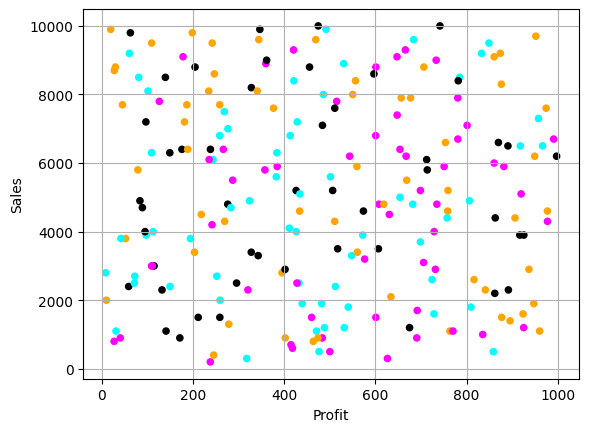

In [95]:
# Let's plot a scatter plot of profit versus sales, colored by Segment, for all New York sales
df[df['State'] == 'New York'].plot(
    kind='scatter',
    x='Profit',
    y='Sales',
    c=df[df['State'] == 'New York']['Segment'].map({'A': 'black', 'B': 'cyan', 'C': 'magenta', 'D': 'orange'}),
    grid=True
)

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWa

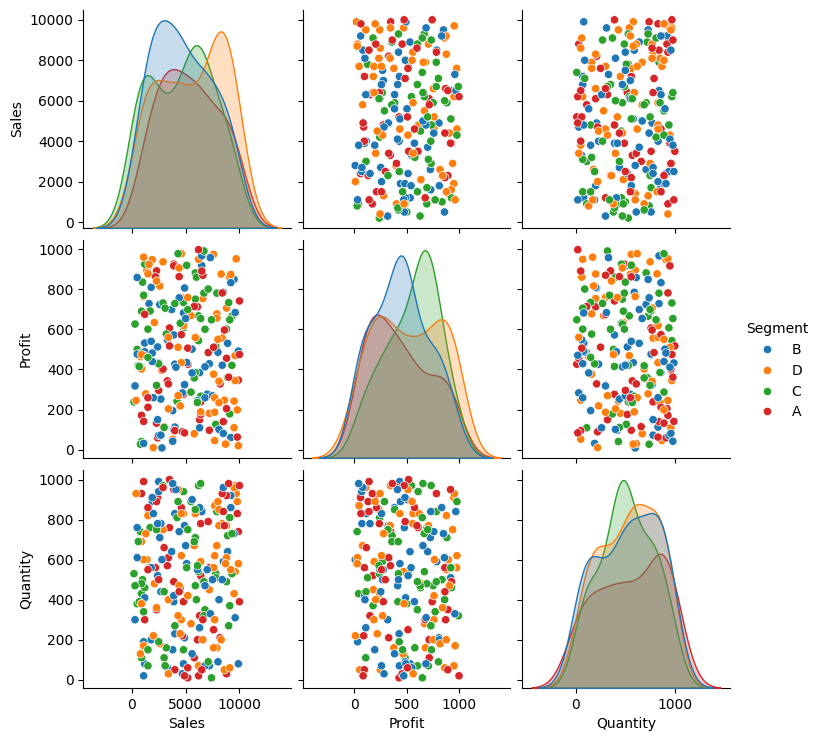

In [96]:
import seaborn as sns
sns.pairplot(df[df['State'] == 'New York'][['Sales', 'Profit', 'Quantity', 'Segment']], hue='Segment')

In [98]:
df2 = df[df['State'] == 'New York'][['Sales', 'Profit', 'Quantity']]
df2

Sales  Profit  Quantity
Row ID                         
101      6500  917.64       510
258      1900  947.15       910
264      7800  515.11       530
292      4900  806.08       210
367      2800  395.35       960
...       ...     ...       ...
9901     9000  361.66       980
9918     2400  149.83       780
9920     4000  728.68       270
9929     5200  698.62       750
9936     1500  259.11       550

[226 rows x 3 columns]

<Axes: >

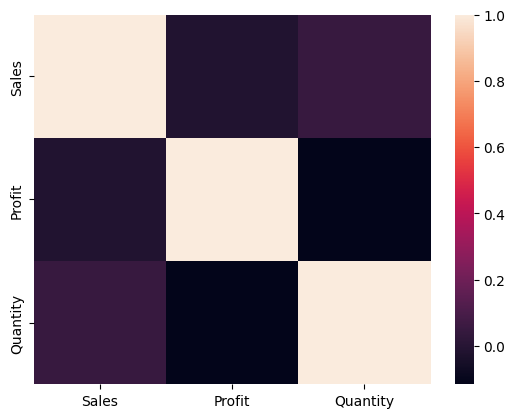

In [104]:
sns.heatmap(df2.corr())

In [ ]:
df.plot?

In [ ]:
# What if we want to do some aggregation?

# Let's say we want to answer a question like "What is the average profit and sales by state"

In [105]:
df.groupby?

Signature:
df.groupby(
    by=None,
    axis: 'Axis | lib.NoDefault' = <no_default>,
    level: 'IndexLabel | None' = None,
    as_index: 'bool' = True,
    sort: 'bool' = True,
    group_keys: 'bool' = True,
    observed: 'bool | lib.NoDefault' = <no_default>,
    dropna: 'bool' = True,
) -> 'DataFrameGroupBy'
Docstring:
Group DataFrame using a mapper or by a Series of columns.

A groupby operation involves some combination of splitting the
object, applying a function, and combining the results. This can be
used to group large amounts of data and compute operations on these
groups.

Parameters
----------
by : mapping, function, label, pd.Grouper or list of such
    Used to determine the groups for the groupby.
    If ``by`` is a function, it's called on each value of the object's
    index. If a dict or Series is passed, the Series or dict VALUES
    will be used to determine the groups (the Series' values are first
    aligned; see ``.align()`` method). If a list or ndarray of length

In [106]:
df.groupby("State")

In [110]:
df.groupby("State")[["Sales", "Profit"]].mean()

Sales      Profit
State                                  
Alabama         5034.285714  492.275600
Alaska          4935.135135  511.576216
Arizona         5143.216080  528.225176
Arkansas        4787.150838  477.374972
California      4971.428571  538.960476
Colorado        4948.633880  502.276120
Connecticut     5111.616162  492.797525
Delaware        4918.000000  481.393450
Florida         4995.135135  510.221514
Georgia         4844.549763  475.013318
Hawaii          5344.390244  483.989951
Idaho           5462.083333  498.237875
Illinois        4547.368421  485.487947
Indiana         5043.877551  507.495816
Iowa            5006.382979  511.712723
Kansas          4803.271028  507.885701
Kentucky        4791.469194  495.219384
Louisiana       5176.328502  477.663623
Maine           4964.705882  528.161283
Maryland        5181.220657  487.707559
Massachusetts   4952.830189  508.957642
Michigan        4886.635945  494.221797
Minnesota       5042.713568  439.358593
Mississippi     5148.076923  503.291490
Missouri        5189.784946  482.605108
Montana         4789.603960  527.002475
Nebraska        4908.333333  476.389278
Nevada          4938.418079  478.285876
New Hampshire   5086.010363  505.650777
New Jersey      5127.692308  530.977846
New Mexico      4927.488152  505.041801
New York        5053.097345  489.143673
North Carolina  5308.571429  468.855810
North Dakota    4943.333333  510.615722
Ohio            5001.010101  464.184747
Oklahoma        5354.687500  485.211198
Oregon          5023.163842  472.637458
Pennsylvania    5133.333333  490.609683
Rhode Island    5043.181818  504.304045
South Carolina  5268.202765  477.047327
South Dakota    4914.146341  525.464537
Tennessee       5368.656716  524.308010
Texas           5140.703518  524.436080
Utah            4905.909091  505.144500
Vermont         5135.294118  511.242781
Virginia        4832.240437  514.939945
Washington      4774.869110  469.961780
West Virginia   4984.659091  496.730057
Wisconsin       5303.317536  505.470000
Wyoming         4773.953488  517.346791

In [111]:
# What about a full blown excel-style pivot table?
df.pivot_table?

Signature:
df.pivot_table(
    values=None,
    index=None,
    columns=None,
    aggfunc: 'AggFuncType' = 'mean',
    fill_value=None,
    margins: 'bool' = False,
    dropna: 'bool' = True,
    margins_name: 'Level' = 'All',
    observed: 'bool | lib.NoDefault' = <no_default>,
    sort: 'bool' = True,
) -> 'DataFrame'
Docstring:
Create a spreadsheet-style pivot table as a DataFrame.

The levels in the pivot table will be stored in MultiIndex objects
(hierarchical indexes) on the index and columns of the result DataFrame.

Parameters
----------
values : list-like or scalar, optional
    Column or columns to aggregate.
index : column, Grouper, array, or list of the previous
    Keys to group by on the pivot table index. If a list is passed,
    it can contain any of the other types (except list). If an array is
    passed, it must be the same length as the data and will be used in
    the same manner as column values.
columns : column, Grouper, array, or list of the previous
    Keys t

In [112]:
df.pivot_table(values=["Sales", "Profit"], index=["State", "Segment"], columns=["Category"]).head(50)

Profit                               \
Category            Consumer Discretionary Consumer Staples      Energy   
State       Segment                                                       
Alabama     A                   413.050000       480.090000  604.167500   
            B                   441.600000       544.456667  508.560000   
            C                   390.855714        11.290000  478.550000   
            D                   587.976667       421.326000  211.850000   
Alaska      A                   407.485556       723.390000  200.805000   
            B                   470.592500       406.844000  448.705000   
            C                   536.776667       492.576000  367.796667   
            D                   545.296000       876.856667  537.857500   
Arizona     A                   517.040000       429.334000  634.415000   
            B                   685.056667       621.683333  582.793333   
            C                   895.213333       485.355714  400.911429   
            D                   599.428333       622.980000  732.480000   
Arkansas    A                   424.223333              NaN  367.655000   
            B                   303.511667       472.474000  684.784286   
            C                   597.470000       439.266000  639.012500   
            D                   594.572500       233.216667  388.730000   
California  A                   658.690000       512.107143  459.532500   
            B                   595.588333       484.165000  406.426667   
            C                   605.234000       868.362500  594.212500   
            D                   438.156667       449.838333  385.823333   
Colorado    A                   106.710000       571.086667  339.867500   
            B                   391.950000       282.914000  581.443333   
            C                   574.861667       593.277500  680.796667   
            D                   611.528333       429.482500  508.892500   
Connecticut A                   569.140000       463.292000  179.700000   
            B                   478.056667       480.605000  749.840000   
            C                   247.616667       403.126667  502.976000   
            D                   508.352500       463.325714  616.970000   
Delaware    A                   216.042500       552.584286  440.678000   
            B                   380.717143       686.135000  248.568000   
            C                   485.900000       523.115000  421.010000   
            D                   489.330000       436.758000  772.100000   
Florida     A                   987.630000       764.350000  443.613333   
            B                   560.076667       575.902500  518.657778   
            C                   736.610000       493.814000  459.137500   
            D                   580.100000       682.963333  442.035000   
Georgia     A                   624.711429       504.352857  400.858000   
            B                   511.335714       491.538000  588.418750   
            C                   351.480000       918.420000  742.046667   
            D                   332.256667       771.120000  405.352000   
Hawaii      A                   438.767500       565.652500  724.758333   
            B                   460.552500       610.130000  305.206667   
            C                   379.437500       444.094000  770.307500   
            D                   451.915000       517.235000  599.645000   
Idaho       A                   435.740000       426.432000  646.360000   
            B                   500.186000       425.613000  532.843333   
            C                   365.231250       621.381667  395.160000   
            D                   401.658333       463.880000  466.165000   
Illinois    A                   428.555000        78.230000  307.908000   
            B                   499.920000       333.484000  394.912222   

                                                         \
C

In [113]:
# We can then select into this table
df.pivot_table(values=["Sales", "Profit"], index=["State", "Category"], columns=["Segment"]).loc['New York']

Profit                                      \
Segment                              A           B           C           D   
Category                                                                     
Consumer Discretionary      381.556667  443.605000  646.998333  836.900000   
Consumer Staples            568.400000  610.787500  767.135000  394.462500   
Energy                      399.117273  613.957500  362.473333  707.710000   
Financials                  492.896667  605.053333  451.948333  755.644000   
Health Care                 468.762500  465.220000  430.880000  233.866667   
Industrials                 674.820000  733.716667  665.424000  489.269091   
Information Technology      421.394000  442.182500  436.090000  168.846667   
Materials                   345.476250  264.893750  656.900000  562.814000   
Real Estate                 713.015000  417.910000  553.935000  356.210000   
Telecommunication Services         NaN  404.762727  747.484000  505.304000   
Utilities                          NaN  320.793333  415.993333  547.917143   

                                  Sales                                         
Segment                               A            B            C            D  
Category                                                                        
Consumer Discretionary      6450.000000  3275.000000  4016.666667  5820.000000  
Consumer Staples            7350.000000  7025.000000  6450.000000  5175.000000  
Energy                      5345.454545  6650.000000  3133.333333  4800.000000  
Financials                  5122.222222  5433.333333  3166.666667  4180.000000  
Health Care                 3850.000000  5300.000000  3933.333333  6383.333333  
Industrials                 1200.000000  6200.000000  4280.000000  5481.818182  
Information Technology      7420.000000  4400.000000  5775.000000  7233.333333  
Materials                   3925.000000  4625.000000  5814.285714  5060.000000  
Real Estate                 5950.000000  4614.285714  4616.666667  3500.000000  
Telecommunication Services          NaN  3972.727273  5780.000000  6120.000000  
Utilities                           NaN  3116.666667  4411.111111  7214.285714

In [114]:
df.pivot_table(values=["Sales", "Profit"], index=["State", "Category"], columns=["Segment"]).loc['New York'].style.background_gradient('Blues')

In [ ]:
# And of course, we can output to another format

# you might need to run the following line first
# !pip install openpyxl

df.to_excel("superstore.xlsx")